In [1]:
# Restricted Boltzmann machine classical
# Classical RBM libraries
import numpy as np
import pandas as pd
from math import pi, acos, sin, sqrt
#from scipy.linalg import norm
from numpy.linalg import norm
import matplotlib.pyplot as plt

# Quantum computing RBM libraries
import qiskit
from qiskit import transpile
from qiskit import Aer, execute, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RYGate
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector, DensityMatrix

Qubit-0 probs: [0.5 0.5]
Qubit-1 probs: [0.5 0.5]
Qubit-2 probs: [0.75951506 0.24048494]
        ┌─────────┐             ░ ┌─┐      
   q_0: ┤ Ry(π/2) ├─────■───────░─┤M├──────
        ├─────────┤     │       ░ └╥┘┌─┐   
   q_1: ┤ Ry(π/2) ├─────■───────░──╫─┤M├───
        └─────────┘┌────┴─────┐ ░  ║ └╥┘┌─┐
   q_2: ───────────┤ Ry(7π/8) ├─░──╫──╫─┤M├
                   └──────────┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════════════╩══╩══╩═
                                   0  1  2 
{'001': 254, '111': 255, '000': 241, '010': 267, '011': 7}


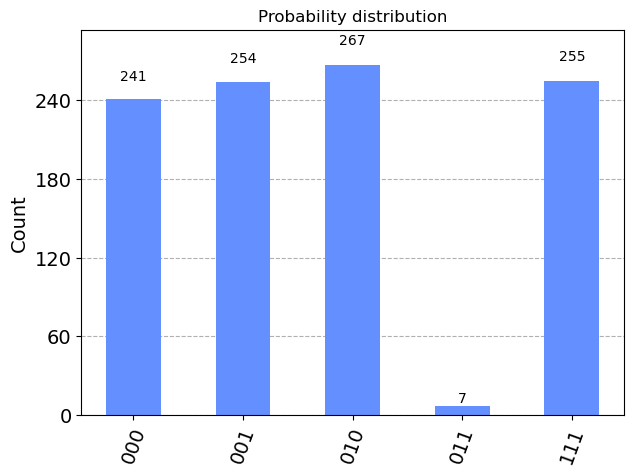

In [66]:

ang1 = 4*pi/8
ang2 = 4*pi/8
ang3 = 7*pi/8
circ = qiskit.QuantumCircuit(3)
circ.ry(ang1,0)
circ.ry(ang2,1)

ccry = RYGate(ang3).control(2)
circ.append(ccry, [0, 1, 2 ])


rho = DensityMatrix(circ)
# Probabilities for measuring only qubit-i
qprobs = np.zeros((3,2))
for iq in range(3):
    qprobs[iq] = rho.probabilities([iq])
    print('Qubit-{} probs: {}'.format(iq, qprobs[iq]))
circ.measure_all()

sim_mode = 'aer_simulator'
simulator = Aer.get_backend(sim_mode)

result = execute(circ, simulator).result()
counts = result.get_counts(circ)
print(circ)
print(counts)
plot_histogram(counts, title='Probability distribution')
